In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
# Use the iris database to answer the following quesitons:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_length', ylabel='Density'>

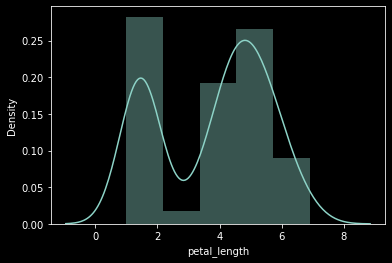

In [12]:
# 1. What does the distribution of petal lengths look like?
sns.distplot(iris.petal_length)

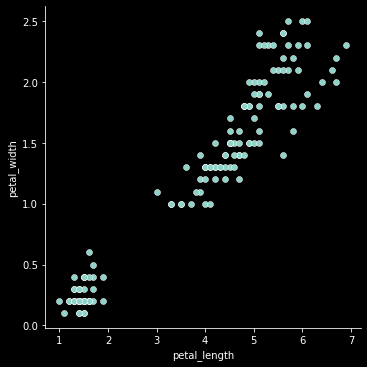

In [17]:
# 2. Is there a correlation between petal length and petal width?
sns.relplot(x='petal_length', y='petal_width', data=iris)
# positive correlation between petal length and width

In [25]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length?
# probably not, low correlation between sepal width and length
iris.groupby('species')[['sepal_width', 'sepal_length']].mean()

,sepal_width,sepal_length
species,,
setosa,3.428,5.006
versicolor,2.770,5.936
virginica,2.974,6.588


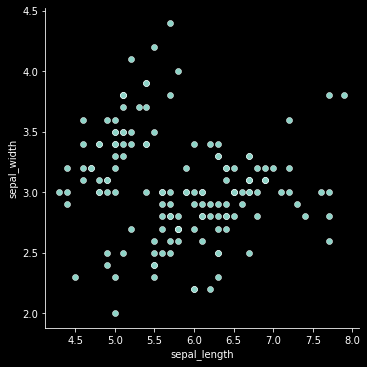

In [26]:
sns.relplot(x='sepal_length', y='sepal_width', data=iris)

<AxesSubplot:ylabel='species'>

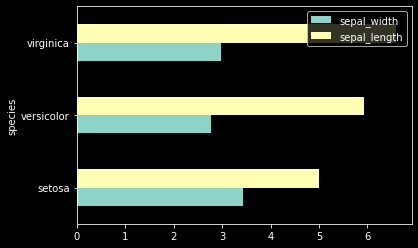

In [23]:
iris.groupby('species')[['sepal_width', 'sepal_length']].mean().plot.barh()

<AxesSubplot:ylabel='species'>

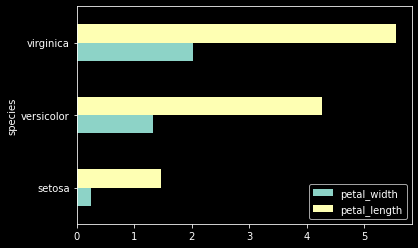

In [27]:
# 4. Which features would be best used to predict species?
# petal length and width better predicts species
iris.groupby('species')[['petal_width', 'petal_length']].mean().plot.barh()

In [42]:
# 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set.
anscombe = sns.load_dataset('anscombe')
anscombe.head()
# Use pandas to group the data by the dataset column,
# and calculate summary statistics for each dataset. What do you notice?
anscombe.x.describe()

count    44.000000
mean      9.000000
std       3.198837
min       4.000000
25%       7.000000
50%       8.000000
75%      11.000000
max      19.000000
Name: x, dtype: float64

In [43]:
anscombe.y.describe()

count    44.000000
mean      7.500682
std       1.958925
min       3.100000
25%       6.117500
50%       7.520000
75%       8.747500
max      12.740000
Name: y, dtype: float64

In [ ]:
# - Plot the x and y values from the anscombe data. Each dataset should be in a separate column.


In [ ]:
#2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.


In [ ]:
#3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

# - Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic.
# (Choose a cutoff point for what constitutes catholic)


In [ ]:
# - Does whether or not a province is Catholic influence fertility?


In [ ]:
# - What measure correlates most strongly with fertility?


In [ ]:
#4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.


In [ ]:
#5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a
# more prominant line showing the average change in reaction time.
